# Studies of data reuse: Population and single cell receptive field maps from mouse visual cortex (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Population and single cell receptive field maps from mouse visual cortex (v1)](https://doi.org/10.25493/VKV1-X9C)", contributed by Matthew W. Self from the
department of Psychiatry, Academic Medical Center, Amsterdam, The Netherlands.

As we can see from the dataset description,

<i>In this study we use population receptive-field (pRF) mapping techniques, which allow estimates to be made of aggregate receptive field sizes, to map the visual cortex of mice using wide-field calcium imaging. We include data relating the position of the pRF to its size across visual cortex. These maps show a region of mouse visual cortex in which pRFs are considerably smaller. We investigated the source of the smaller pRFs by recording receptive-fields from multi-units in the different layers of V1 using laminar electrodes and by using two-photon imaging to tile almost the entirety of V1 at the single-cell level.  We also examine the relationship between RF position and size in the higher visual areas that surround V1 including LM, RL, AL, Am and PM. </i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/1e311509-1dba-437b-b9bf-396ab6ccb553).

This dataset forms part of the results reported in van Beest, E., Mukherjee, S., Kirchberger, L., Schnabel, U., van der Togt, C., Teeuwen, R., Barsegyan, A., Roelfsema, P., Self., M. (2019) A Fovea-Like Representation of Space in Mouse Visual Cortex. *SSRN Electronic Journal*. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3441090

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes:
Data very easy to reuse. Code for the other figures can be found in the EBRAINS dataset and can be opened with MATLAB.

In [1]:
#prepare notebook
!pip install scipy
import scipy.io
import numpy as np
!pip install h5py
import h5py
!pip install pymatreader
from pymatreader import read_mat
!pip install pandas
import pandas as pd
from scipy.io import loadmat
import mat73
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)
import matplotlib.mlab as mlab

In [2]:
#presentation of the data
data=scipy.io.loadmat('hbp-d000047_pRF-mapping-mouse-V1_dev/FoceaPaper_WideFieldStats.mat')
print(data)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 11 17:38:47 2021', '__version__': '1.0', '__globals__': [], 'M': array([[(array([], dtype='<U1'), array(['Vincent'], dtype='<U7'), array([], dtype='<U1'), array([[3]], dtype=uint8), array([[(array([[         nan, 107.        , 105.61538462, 101.01724138,
                         98.49789916,  96.48484848,  93.72178988,  90.15423729,
                         85.19047619,  79.20858896,  75.03846154,  71.13061798,
                         67.45752427,  63.47794118,  60.30355161,  57.01538462,
                         56.33333333]]), array([[       nan, 0.        , 1.67274533, 3.03894133, 3.31391959,
                        3.49501663, 4.67471506, 5.64262573, 6.33289289, 5.96527244,
                        5.74829599, 5.83057229, 5.64459906, 5.24327259, 4.82352207,
                        2.47357833, 0.9701425 ]]), array([[       nan, 0.00076981, 0.00109024, 0.00112761, 0.0008837 ,
                        0.000730

### Fig 1h
An example from a single hemisphere showing that pRF size is linearly related to eccentricity from the focea. We used the slope of this relationship in our analysis.

(40.0, 120.0)

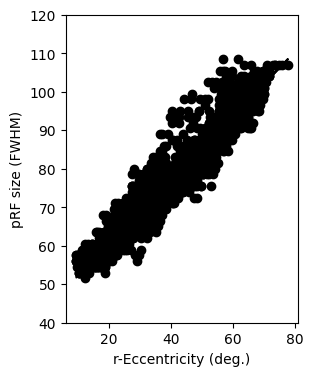

In [49]:

%matplotlib inline
plt.figure(figsize=(3,4))
# sample points 
Y=data['examplepRF']
X=data['exampleEcc']

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b


a, b = best_fit(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit, c='black')

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y,c='black')

plt.ylabel('pRF size (FWHM)')
plt.xlabel('r-Eccentricity (deg.)')
plt.ylim(40,120)

### Fig 1f
The relationship between pRF position and size. Azimuth and elevation
values from individual pixels were binned. The red/green lines show data from the right/left
hemispheres of 11 mice who were imaged bilaterally. The black line shows the average across mice.

In [47]:
import scipy.io as spio
def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif isinstance(sub_elem, np.ndarray):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list

/tmp/ipykernel_19097/4061157539.py:10: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):


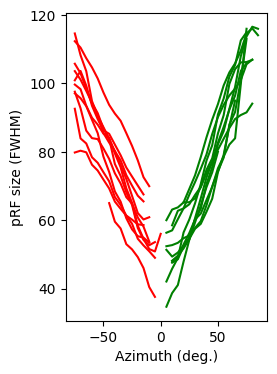

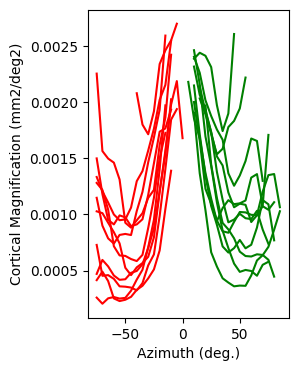

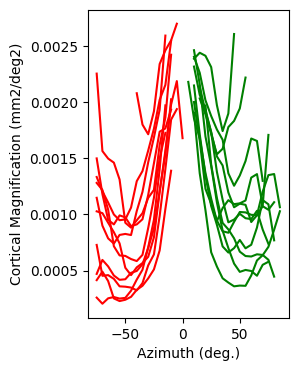

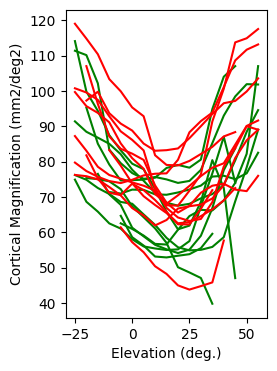

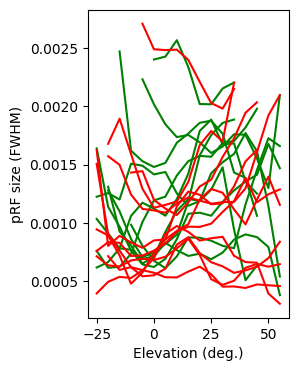

In [62]:

def plot_fig1(y_value, x_value, ytitle,xtitle):
    %matplotlib inline
    plt.figure(figsize=(2.6,4))
    name_y=['y_1','y_2','y_3','y_4','y_5','y_6','y_7','y_8','y_9','y_10','y_11']
    name_x=['x_1','x_2','x_3','x_4','x_5','x_6','x_7','x_8','x_9','x_10','x_11']
    i=1
    n=0
    while i<12:
        name_y[(n)]=(_tolist(data['M'][0,(n)]['Hemi'][y_value]))[0][0][0]
        name_x[(n)]=(_tolist(data['M'][0,(n)]['Hemi'][x_value]))[0][0][0]
        i=i+1
        n=n+1

    name_y2=['y2_1','y2_2','y2_3','y2_4','y2_5','y2_6','y2_7','y2_8','y2_9','y2_10','y2_11']
    name_x2=['x2_1','x2_2','x2_3','x2_4','x2_5','x2_6','x2_7','x2_8','x2_9','x2_10','x2_11']
    i=1
    n=0
    while i<12:
        name_y2[(n)]=(_tolist(data['M'][0,(n)]['Hemi'][y_value]))[0][1][0]
        name_x2[(n)]=(_tolist(data['M'][0,(n)]['Hemi'][x_value]))[0][1][0]
        i=i+1
        n=n+1

    i=1
    n=0
    while i<12:
        plt.plot(name_x[(n)],name_y[(n)], color='g')
        i=i+1
        n=n+1

    i=1
    n=0
    while i<12:
        plt.plot(name_x2[(n)],name_y2[(n)], color='r')
        i=i+1
        n=n+1
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()
    
plot_fig1('A','awx','pRF size (FWHM)','Azimuth (deg.)')
plot_fig1('JA','awx','Cortical Magnification (mm2/deg2)','Azimuth (deg.)')
plot_fig1('JA','awx','Cortical Magnification (mm2/deg2)','Azimuth (deg.)')
plot_fig1('E','ewx','Cortical Magnification (mm2/deg2)','Elevation (deg.)')
plot_fig1('JE','ewx','pRF size (FWHM)','Elevation (deg.)')

### Fig 1i
The distribution of the slope-coefficients, β, across all
hemispheres.

/tmp/ipykernel_19097/4061157539.py:10: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):


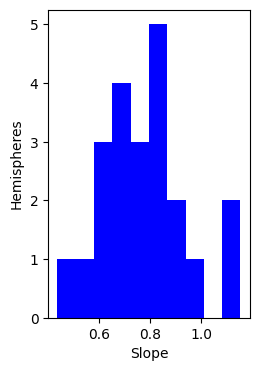

In [64]:

%matplotlib inline
plt.figure(figsize=(2.6,4))

name_y=['y_1','y_2','y_3','y_4','y_5','y_6','y_7','y_8','y_9','y_10','y_11','y_12','y_13','y_14','y_15','y_16','y_17','y_18','y_19','y_20','y_21','y_22']
i=1
n=0
e=[]
while i<23:
    name_y[(n)]=(_tolist(data['hemistat'][0,(n)]['tstat']['beta']))[0][0][1]
    e.append(name_y[(n)])
    i=i+1
    n=n+1
import itertools
e_merged = list(itertools.chain(*e))
n, bins, patches = plt.hist(e_merged, facecolor='blue', alpha=1)
plt.xlabel('Slope')
plt.ylabel('Hemispheres')
plt.show()
